In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest

In [2]:

df = pd.read_csv("../data/extracted_data.csv")
df.head()

,channelTitle,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,text_popularity,days_uploaded,title_length,description_length,tags_count
0,Brawadis,22,1514614,156908,5855,35313,1958,1,2,1,34,361,143
1,Apex Legends,20,2381688,146739,2794,16549,566,1,0,1,60,715,448
2,jacksepticeye,24,2038853,353787,2628,40221,4918,3,0,1,53,513,384
3,XXL,10,496771,23251,1856,7647,5088,1,1,1,56,762,250
4,Mr. Kate,26,1123889,45802,964,2196,4004,1,0,1,55,2493,415


In [21]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,text_popularity,days_uploaded,title_length,description_length,tags_count
count,245987.000000,2.459870e+05,2.459870e+05,245987.000000,2.459870e+05,245987.000000,245987.000000,245987.000000,245987.000000,245987.000000,245987.000000,245987.000000
mean,18.727221,2.656137e+06,1.311227e+05,1239.411209,1.037797e+04,3157.760869,0.821755,1.488778,4.072138,50.324216,1015.342843,214.994670
std,6.779700,8.340805e+06,4.433037e+05,8404.223869,7.532480e+04,1744.163587,0.914576,1.045811,2.454605,20.445713,900.788631,168.498792
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-1.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,17.000000,4.729600e+05,1.804900e+04,0.000000,1.293000e+03,1794.000000,0.000000,1.000000,2.000000,36.000000,403.000000,48.000000
50%,20.000000,9.424540e+05,4.079600e+04,0.000000,2.801000e+03,3061.000000,1.000000,2.000000,4.000000,47.000000,738.000000,194.000000
75%,24.000000,2.117553e+06,1.005080e+05,567.000000,6.519000e+03,4507.000000,1.000000,2.000000,5.000000,63.000000,1361.000000,397.000000
max,29.000000,2.777917e+08,1.602153e+07,879354.000000,6.738537e+06,19332.000000,3.000000,3.000000,37.000000,100.000000,4998.000000,500.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245987 entries, 0 to 245986
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   channelTitle        245987 non-null  object
 1   categoryId          245987 non-null  int64 
 2   view_count          245987 non-null  int64 
 3   likes               245987 non-null  int64 
 4   dislikes            245987 non-null  int64 
 5   comment_count       245987 non-null  int64 
 6   channel_age         245987 non-null  int64 
 7   image_popularity    245987 non-null  int64 
 8   text_popularity     245987 non-null  int64 
 9   days_uploaded       245987 non-null  int64 
 10  title_length        245987 non-null  int64 
 11  description_length  245987 non-null  int64 
 12  tags_count          245987 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 24.4+ MB


In [23]:
df.nunique()

channelTitle            8221
categoryId                15
view_count            234651
likes                 130808
dislikes               13179
comment_count          34423
channel_age             6754
image_popularity           5
text_popularity            4
days_uploaded             38
title_length             100
description_length      4221
tags_count               496
dtype: int64

#### 76 redova kojima nedostaje vrednost za view_count

In [24]:
df[df['view_count'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 15289 to 201188
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   channelTitle        76 non-null     object
 1   categoryId          76 non-null     int64 
 2   view_count          76 non-null     int64 
 3   likes               76 non-null     int64 
 4   dislikes            76 non-null     int64 
 5   comment_count       76 non-null     int64 
 6   channel_age         76 non-null     int64 
 7   image_popularity    76 non-null     int64 
 8   text_popularity     76 non-null     int64 
 9   days_uploaded       76 non-null     int64 
 10  title_length        76 non-null     int64 
 11  description_length  76 non-null     int64 
 12  tags_count          76 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 8.3+ KB


#### 1446 redova kojima nedostaje vrednost za likes

In [25]:
df[df['likes'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 1224 to 244967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   channelTitle        1466 non-null   object
 1   categoryId          1466 non-null   int64 
 2   view_count          1466 non-null   int64 
 3   likes               1466 non-null   int64 
 4   dislikes            1466 non-null   int64 
 5   comment_count       1466 non-null   int64 
 6   channel_age         1466 non-null   int64 
 7   image_popularity    1466 non-null   int64 
 8   text_popularity     1466 non-null   int64 
 9   days_uploaded       1466 non-null   int64 
 10  title_length        1466 non-null   int64 
 11  description_length  1466 non-null   int64 
 12  tags_count          1466 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 160.3+ KB


#### 147916 redova kojima nedostaje vrednost za dislikes, razlog je to što od decembra 2021. godine podaci o broju dislajkova za video snimak nisu javno dostupni

In [26]:
df[df['dislikes'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147916 entries, 1224 to 245986
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   channelTitle        147916 non-null  object
 1   categoryId          147916 non-null  int64 
 2   view_count          147916 non-null  int64 
 3   likes               147916 non-null  int64 
 4   dislikes            147916 non-null  int64 
 5   comment_count       147916 non-null  int64 
 6   channel_age         147916 non-null  int64 
 7   image_popularity    147916 non-null  int64 
 8   text_popularity     147916 non-null  int64 
 9   days_uploaded       147916 non-null  int64 
 10  title_length        147916 non-null  int64 
 11  description_length  147916 non-null  int64 
 12  tags_count          147916 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 15.8+ MB


#### 677 redova kojima nedostaje vrednost za channel_age

In [27]:
df[df['channel_age'] == -1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 183 to 241559
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   channelTitle        677 non-null    object
 1   categoryId          677 non-null    int64 
 2   view_count          677 non-null    int64 
 3   likes               677 non-null    int64 
 4   dislikes            677 non-null    int64 
 5   comment_count       677 non-null    int64 
 6   channel_age         677 non-null    int64 
 7   image_popularity    677 non-null    int64 
 8   text_popularity     677 non-null    int64 
 9   days_uploaded       677 non-null    int64 
 10  title_length        677 non-null    int64 
 11  description_length  677 non-null    int64 
 12  tags_count          677 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 74.0+ KB


#### 6488 redova kojima nedostaje vrednost za image_popularity

In [28]:
df[df['image_popularity'] == -1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6488 entries, 26 to 245847
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   channelTitle        6488 non-null   object
 1   categoryId          6488 non-null   int64 
 2   view_count          6488 non-null   int64 
 3   likes               6488 non-null   int64 
 4   dislikes            6488 non-null   int64 
 5   comment_count       6488 non-null   int64 
 6   channel_age         6488 non-null   int64 
 7   image_popularity    6488 non-null   int64 
 8   text_popularity     6488 non-null   int64 
 9   days_uploaded       6488 non-null   int64 
 10  title_length        6488 non-null   int64 
 11  description_length  6488 non-null   int64 
 12  tags_count          6488 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 709.6+ KB


#### Skup podatak sadrzi 83 duplikat vrednosti.

In [29]:
df1 = df.drop_duplicates()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245904 entries, 0 to 245986
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   channelTitle        245904 non-null  object
 1   categoryId          245904 non-null  int64 
 2   view_count          245904 non-null  int64 
 3   likes               245904 non-null  int64 
 4   dislikes            245904 non-null  int64 
 5   comment_count       245904 non-null  int64 
 6   channel_age         245904 non-null  int64 
 7   image_popularity    245904 non-null  int64 
 8   text_popularity     245904 non-null  int64 
 9   days_uploaded       245904 non-null  int64 
 10  title_length        245904 non-null  int64 
 11  description_length  245904 non-null  int64 
 12  tags_count          245904 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 26.3+ MB


In [3]:
numeric_features = ['view_count', 'dislikes', 'comment_count', 'channel_age', 'days_uploaded', 'title_length', 'tags_count', 'description_length']
categorical_features = ['categoryId', 'image_popularity', 'text_popularity']
target = "likes"
print(f'numeric_features:\n{numeric_features}\n\ncategorical_features:\n{categorical_features}\n\ntarget:\n{target}')

numeric_features:
['view_count', 'dislikes', 'comment_count', 'channel_age', 'days_uploaded', 'title_length', 'tags_count', 'description_length']

categorical_features:
['categoryId', 'image_popularity', 'text_popularity']

target:
likes


#### Najcesce se pojavljuju video snimci sa kategorijama 24, 20 i 10, sto predstavlja kategorija Entertainment, Gaming i Music u tom redosledu.
#### Sto se tice kategorije kojoj pripada slika, najvise snimaka ima semi popularnu sliku, zatim slede popularne, pa nepopularne, dok najmanje snimaka ima veoma popularnu sliku
#### Sto se tice kategorije teksta, najvise snimaka ima negativan tekst, zatim slede snimci za pozitivnim, veoma pozitivnim i veoma negativnim tekstom

In [4]:
for i in categorical_features:
    print(f'{i}\n{np.round((df[i].value_counts() / df[i].value_counts().sum()) * 100,2)}')

categoryId
24    19.99
20    19.88
10    16.39
17    11.57
22     8.44
23     4.98
1      4.04
25     3.54
28     3.02
26     2.60
27     2.46
2      1.99
19     0.60
15     0.45
29     0.05
Name: categoryId, dtype: float64
image_popularity
 1    39.04
 0    38.43
 2    13.91
 3     5.98
-1     2.64
Name: image_popularity, dtype: float64
text_popularity
2    30.82
1    26.99
0    22.11
3    20.08
Name: text_popularity, dtype: float64


#### Vrednosti za broj pregleda, broj dislajkova, broj komentara i broj lajkova su u velikom opsegu, pa se logaritmuju kako bi se bolje videli na grafiku

In [5]:
df['log_view_count'] = df.apply(lambda row: np.log2(row['view_count']) if row['view_count'] != 0 else row['view_count'], axis=1)
df['log_dislikes'] = df.apply(lambda row: np.log2(row['dislikes']) if row['dislikes'] != 0 else row['dislikes'], axis=1)
df['log_comment_count'] = df.apply(lambda row: np.log2(row['comment_count']) if row['comment_count'] != 0 else row['comment_count'], axis=1)
df['log_likes'] = df.apply(lambda row: np.log2(row['likes']) if row['likes'] != 0 else row['likes'], axis=1)
df

,channelTitle,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,text_popularity,days_uploaded,title_length,description_length,tags_count,log_view_count,log_dislikes,log_comment_count,log_likes
0,Brawadis,22,1514614,156908,5855,35313,1958,1,2,1,34,361,143,20.530519,12.515453,15.107912,17.259559
1,Apex Legends,20,2381688,146739,2794,16549,566,1,0,1,60,715,448,21.183553,11.448116,14.014456,17.162893
2,jacksepticeye,24,2038853,353787,2628,40221,4918,3,0,1,53,513,384,20.959326,11.359750,15.295661,18.432522
3,XXL,10,496771,23251,1856,7647,5088,1,1,1,56,762,250,18.922221,10.857981,12.900678,14.505005
4,Mr. Kate,26,1123889,45802,964,2196,4004,1,0,1,55,2493,415,20.100068,9.912889,11.100662,15.483123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245982,SomeThingElseYT,23,563422,68917,0,1822,3634,1,1,7,34,410,257,19.103856,0.000000,10.831307,16.072572
245983,IShowSpeed,20,2440589,114121,0,5828,2833,1,2,7,40,1096,26,21.218798,0.000000,12.508785,16.800205
245984,ESPN FC,17,474333,5730,0,343,2027,2,3,6,81,156,454,18.855541,0.000000,8.422065,12.484319
245985,Marvel Entertainment,24,804338,29540,0,1972,6764,1,2,6,47,851,13,19.617442,0.000000,10.945444,14.850382


#### Prvo se crtaju density grafovi, koji služe da prikažu distribuciju podataka.

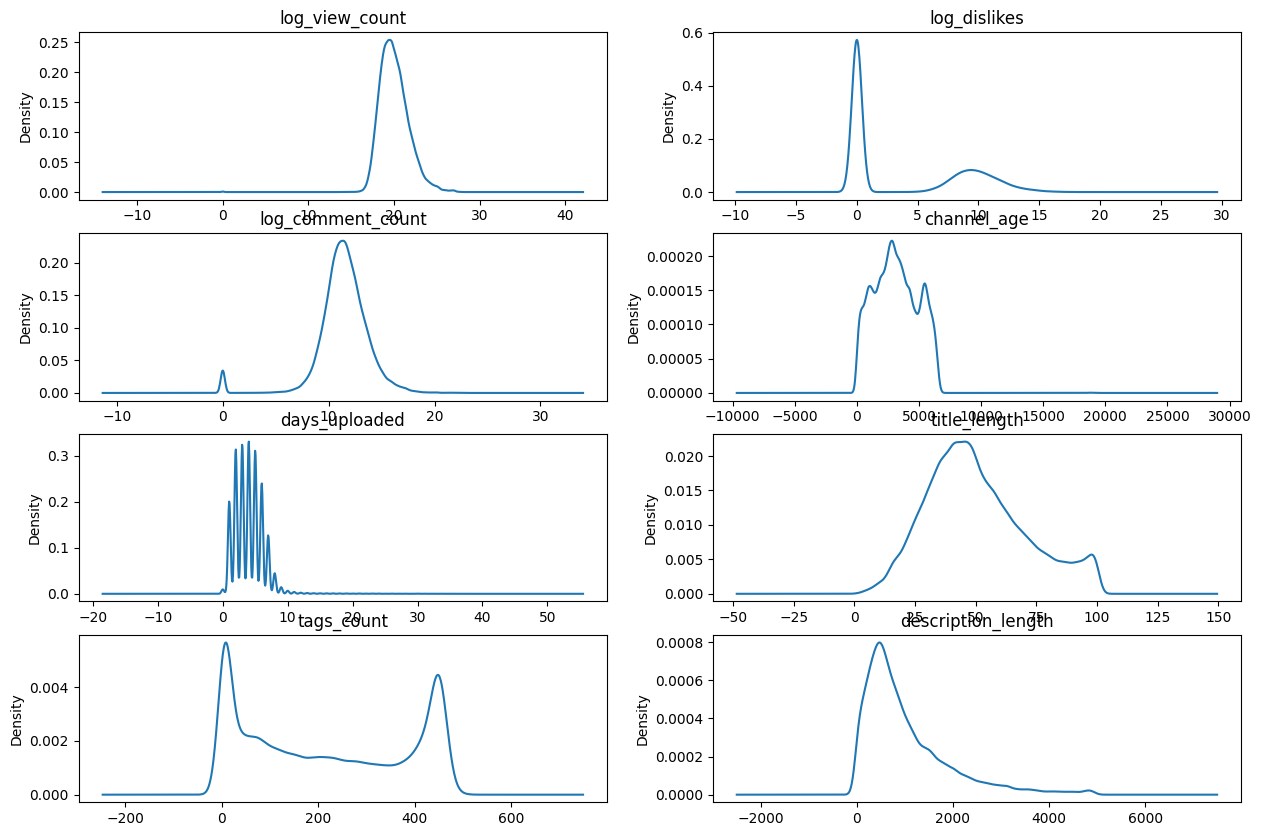

In [6]:
log_numeric_features = ['log_view_count', 'log_dislikes', 'log_comment_count', 'channel_age', 'days_uploaded', 'title_length', 'tags_count', 'description_length']

fig,ax = plt.subplots(4,2,figsize=(15,10))
row = col = 0
for n,i in enumerate(log_numeric_features):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    df[i].plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1

In [16]:
for i in numeric_features:
    print(f'{i}: {"Not Gaussian" if normaltest(df[i].values,)[1]<0.05 else "Gaussian"}  {normaltest(df[i].values)}')

view_count: Not Gaussian  NormaltestResult(statistic=426119.0338390607, pvalue=0.0)
dislikes: Not Gaussian  NormaltestResult(statistic=762464.6591132695, pvalue=0.0)
comment_count: Not Gaussian  NormaltestResult(statistic=719794.7124648655, pvalue=0.0)
channel_age: Not Gaussian  NormaltestResult(statistic=4757.8580284396085, pvalue=0.0)
days_uploaded: Not Gaussian  NormaltestResult(statistic=178115.8107108625, pvalue=0.0)
title_length: Not Gaussian  NormaltestResult(statistic=10375.787985704334, pvalue=0.0)
tags_count: Not Gaussian  NormaltestResult(statistic=1429570.8618057736, pvalue=0.0)
description_length: Not Gaussian  NormaltestResult(statistic=79096.73433709364, pvalue=0.0)


In [17]:
for i in numeric_features:
    print(f'{i}: {np.abs(np.round((df[i].std()/df[i].median()) * 100,2))}')

view_count: 885.01
dislikes: inf
comment_count: 2689.21
channel_age: 56.98
days_uploaded: 61.37
title_length: 43.5
tags_count: 86.86
description_length: 122.06


C:\Users\pc\AppData\Local\Temp\ipykernel_11516\1784928176.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  print(f'{i}: {np.abs(np.round((df[i].std()/df[i].median()) * 100,2))}')


#### Poseban prikaz distribucije za broj lajokva, jer je to ciljno obeležje.

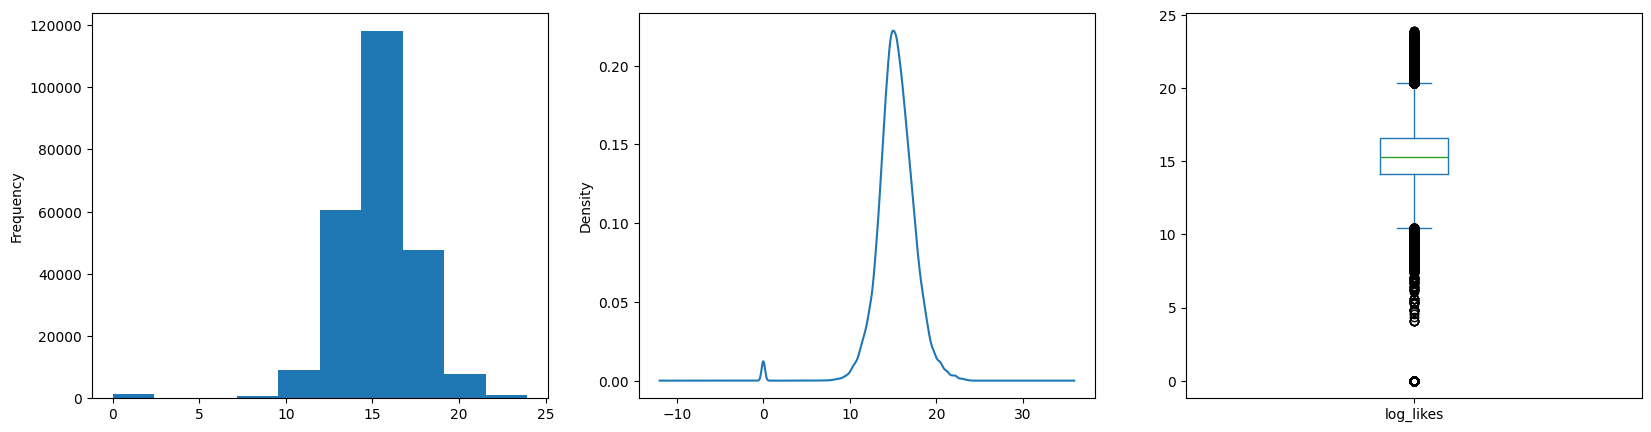

In [18]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
df['log_likes'].plot(kind="hist",ax=ax[0])
df['log_likes'].plot(kind="kde",ax=ax[1])
df['log_likes'].plot(kind="box",ax=ax[2])
plt.show()

#### Sledeći grafikoni služe da prikažu da li postoji linearna zavisnost između ciljnog obeležja(broj lajkova) i ostlaih numeričkih atributa. Može se videti da postoji linearna zavisnost  izmedju broja lajkova i broja pregleda, broja dislajkova i broja komentara.

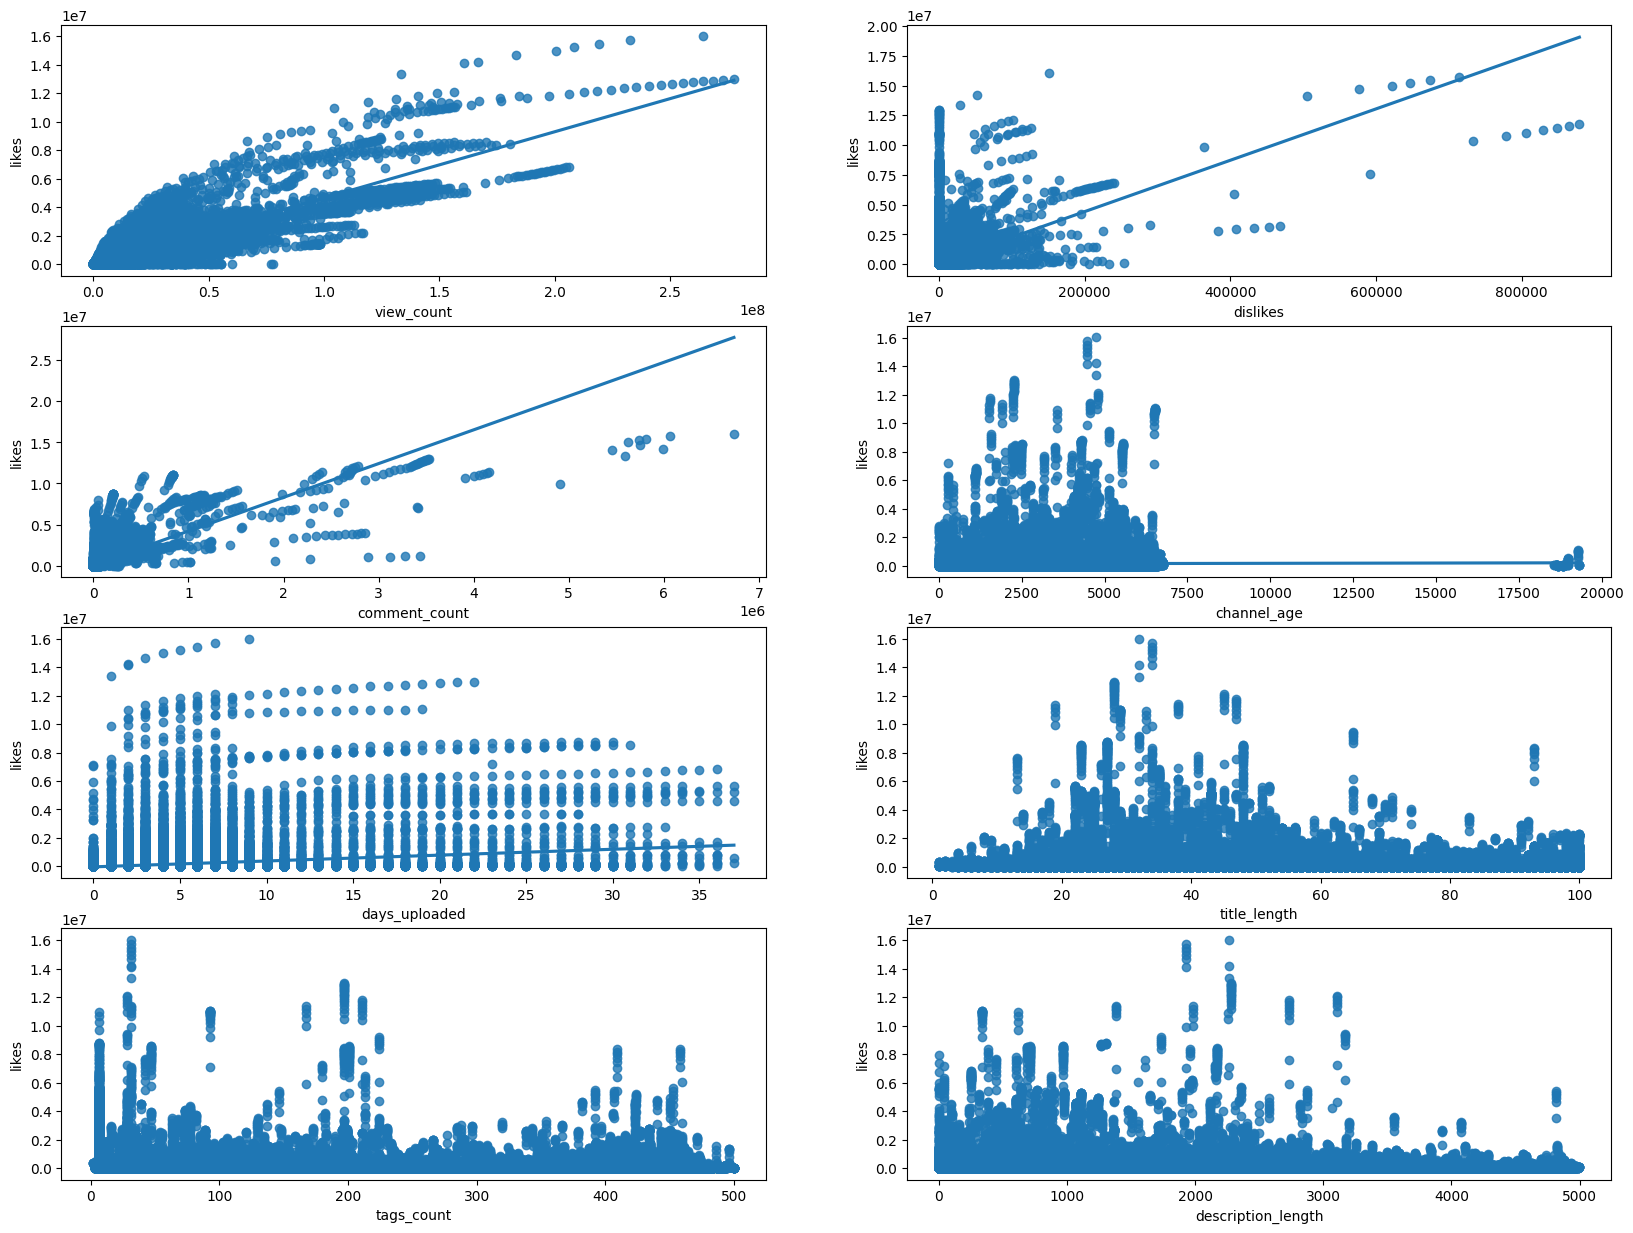

In [7]:
fig,ax = plt.subplots(4,2,figsize=(20,15))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sb.regplot(x=i,y="likes",data=df,ax=ax[row,col],ci=False)
    col += 1

#### Sledeći grafik prikazuje koliko lajkova imaju video snimci po kategoriji kojoj pripadaju. Može se videti da snimci koji pripadaju kategorijama 2(Autos & Vehicles), 15(Pets & Animals), 19(Travel & Events), 25(News & Politics) i 29(Nonprofits & Activism) imaju manji broj lajkova u odnosu na video snimke drugih kategorija.

<Axes: xlabel='categoryId', ylabel='likes'>

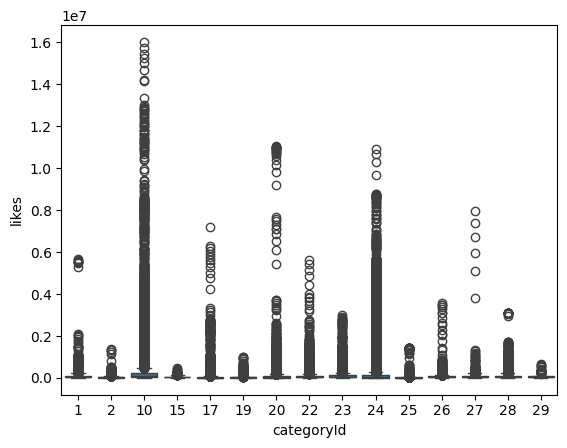

In [24]:
sb.boxplot(x=df[categorical_features[0]],y=df[target])

#### Isto kao prethodni krafik, samo se ovde kategorija odnosi na popularnost slike, -1 su snimci sa nedostajućom vrednošću za kategoriju slike.

<Axes: xlabel='image_popularity', ylabel='likes'>

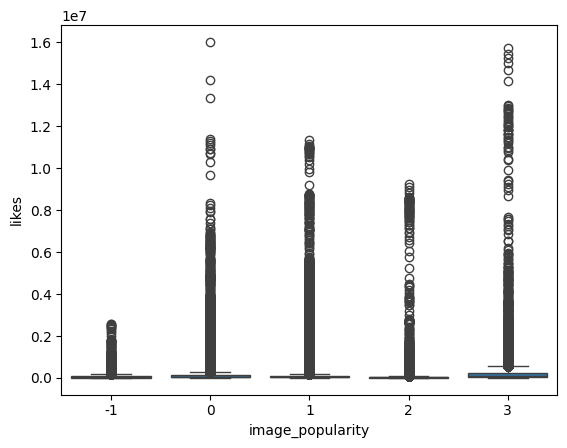

In [25]:
sb.boxplot(x=df[categorical_features[1]],y=df[target])

#### Isto kao prethodni krafik, samo se ovde kategorija odnosi na popularnost tekstualnih atributa.

<Axes: xlabel='text_popularity', ylabel='likes'>

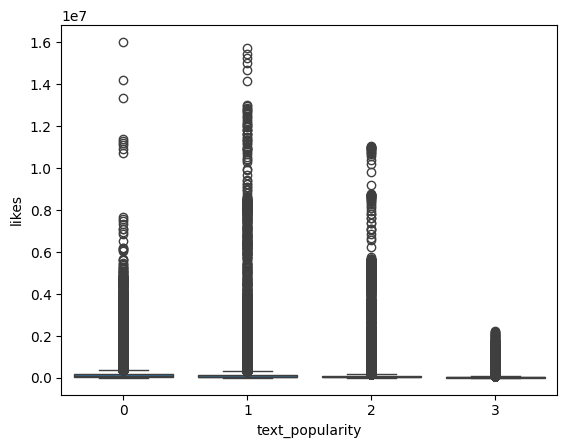

In [26]:
sb.boxplot(x=df[categorical_features[2]],y=df[target])

#### Na kraju se crta matrica korelacija za sve numeričke atribute i ciljno obeležje. Iz matrice se može zaključiti da postoji slaba korelacija između broja lajkova i starosti kanala, kao i dužine opisa video snimka.

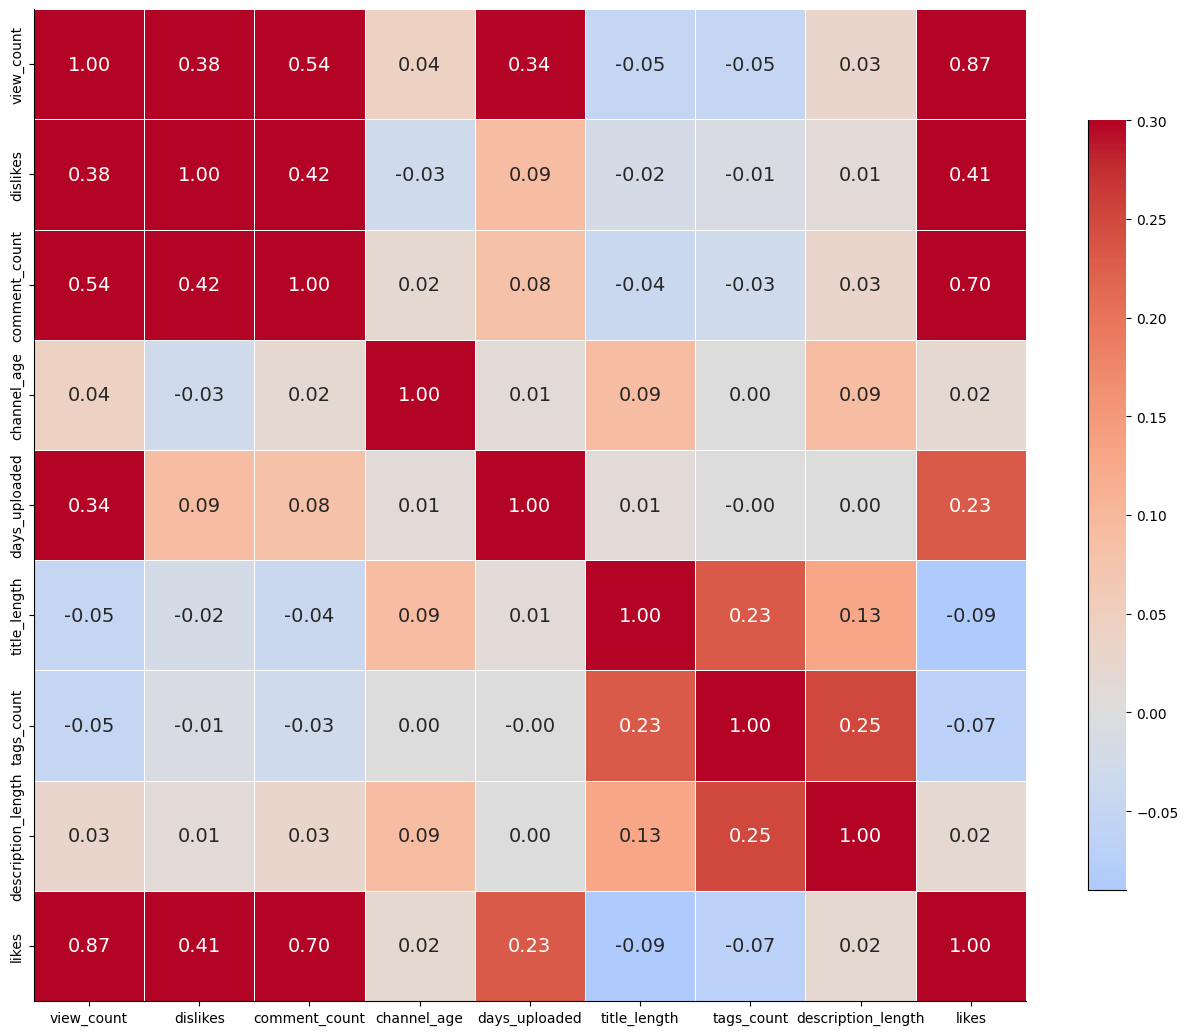

In [33]:
num_columns = numeric_features.copy() 
num_columns.append('likes')

corr = df[num_columns].corr().round(2)

plt.figure(figsize=(16, 20))
g = sb.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"fontsize":14})
sb.despine()

plt.show()